In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder

In [80]:
data=pd.read_csv('https://raw.githubusercontent.com/Manichellappan/DataScienceMasterclass/main/04%20-%20Data%20Preprocessing/student_assignment.csv')

In [81]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
99,42.0,46673.04,False,5.0,38.8,10.9
100,35.0,27089.59,True,5.0,35.3,1.6
101,61.0,83082.63,True,4.0,35.6,3.7
102,39.0,61868.49,True,5.0,37.1,3.8


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           103 non-null    float64
 1   Income        104 non-null    float64
 2   Is Student    104 non-null    object 
 3   Num Children  101 non-null    float64
 4   Temperature   104 non-null    float64
 5   Rating        104 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB


In [83]:
data.shape

(104, 6)

In [84]:
data.describe()

,Age,Income,Num Children,Temperature,Rating
count,103.000000,104.000000,101.000000,104.000000,104.000000
mean,52.932039,58456.756442,3.059406,38.399038,3.295192
std,66.249567,22150.934058,4.046781,2.083010,1.448426
min,18.000000,20955.370000,0.000000,35.200000,-3.200000
25%,31.500000,40065.965000,2.000000,36.700000,2.600000
50%,42.000000,58014.560000,3.000000,38.400000,3.400000
75%,53.500000,74489.015000,4.000000,39.925000,4.100000
max,511.000000,99072.180000,40.000000,41.900000,10.900000


In [85]:
data.isna().sum()

Age             1
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [86]:
data.duplicated().sum()

3

In [87]:
data.drop_duplicates(inplace = True)

In [88]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
96,48.0,90964.58,False,2.0,38.9,3.9
97,58.0,70679.33,True,4.0,41.3,4.8
98,50.0,97052.37,True,2.0,37.1,4.6
99,42.0,46673.04,False,5.0,38.8,10.9


In [89]:
data.isna().sum()

Age             1
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [90]:
for col_name in data.select_dtypes(include=np.number).columns[:]:
    print(col_name)
    q1=data[col_name].quantile(.25)
    q3=data[col_name].quantile(.75)
    iqr=(q3-q1)
    low=q1-(1.5*iqr)
    high=q3+(1.5*iqr)
    print(data.loc[(data[col_name]<low) | (data[col_name]>high),col_name])

Age
7     511.0
19    301.0
47    438.0
Name: Age, dtype: float64
Income
Series([], Name: Income, dtype: float64)
Num Children
82    40.0
Name: Num Children, dtype: float64
Temperature
Series([], Name: Temperature, dtype: float64)
Rating
57    -3.2
99    10.9
Name: Rating, dtype: float64


In [91]:
data['Age'].value_counts()

31.0     9
34.0     4
37.0     4
53.0     4
48.0     4
47.0     4
61.0     3
58.0     3
33.0     3
63.0     3
62.0     3
50.0     3
54.0     3
41.0     3
20.0     2
28.0     2
21.0     2
38.0     2
45.0     2
32.0     2
43.0     2
40.0     2
51.0     2
59.0     2
55.0     2
30.0     2
24.0     2
22.0     2
42.0     2
57.0     1
52.0     1
60.0     1
19.0     1
511.0    1
25.0     1
46.0     1
64.0     1
27.0     1
35.0     1
39.0     1
301.0    1
26.0     1
36.0     1
18.0     1
56.0     1
438.0    1
Name: Age, dtype: int64

In [92]:
data[data['Age']>100]

,Age,Income,Is Student,Num Children,Temperature,Rating
7,511.0,59721.22,True,0.0,41.9,1.2
19,301.0,39598.07,True,NaN,40.0,3.3
47,438.0,87051.70,False,3.0,37.3,2.7


In [93]:
data.loc[data['Age']>100,'Age']=np.nan

In [94]:
data['Age'].isna().sum()

4

In [95]:
data['Age'].mode() #most frequent Value

0    31.0
Name: Age, dtype: float64

In [96]:
data['Age'].fillna(data['Age'].mode()[0], inplace= True) #Replacing null value with the most frequent value

In [97]:
data['Age'].value_counts()

31.0    13
34.0     4
37.0     4
53.0     4
48.0     4
47.0     4
63.0     3
33.0     3
61.0     3
62.0     3
58.0     3
41.0     3
50.0     3
54.0     3
45.0     2
28.0     2
21.0     2
32.0     2
38.0     2
43.0     2
40.0     2
20.0     2
30.0     2
51.0     2
59.0     2
55.0     2
24.0     2
22.0     2
42.0     2
46.0     1
52.0     1
60.0     1
19.0     1
25.0     1
27.0     1
57.0     1
56.0     1
39.0     1
64.0     1
26.0     1
36.0     1
18.0     1
35.0     1
Name: Age, dtype: int64

In [98]:
data['Num Children'].value_counts()

4.0     21
3.0     20
2.0     18
0.0     14
5.0     13
1.0     11
40.0     1
Name: Num Children, dtype: int64

In [106]:
data[data['Num Children']==40]

,Age,Income,Is Student,Num Children,Temperature,Rating
82,50.0,34652.57,False,40.0,39.1,3.2


In [107]:
data['Num Children'].mode()

0    4.0
Name: Num Children, dtype: float64

In [108]:
data.loc[data['Num Children']==40,'Num Children']=np.nan

In [109]:
data['Num Children'].value_counts()

4.0    24
3.0    20
2.0    18
0.0    14
5.0    13
1.0    11
Name: Num Children, dtype: int64

In [110]:
data['Num Children'].fillna(data['Num Children'].mode()[0], inplace = True)#Replacing missing values with mode

In [111]:
data.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    0
Temperature     0
Rating          0
dtype: int64

<Axes: >

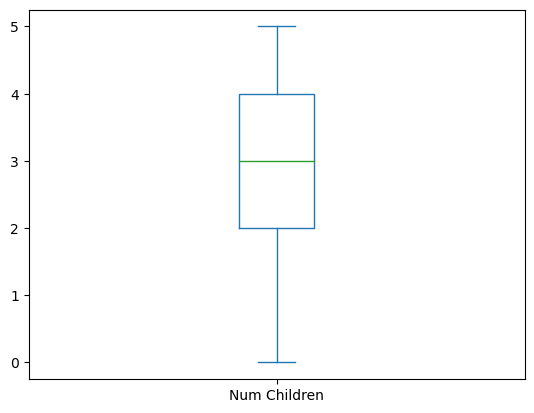

In [112]:
data['Num Children'].plot(kind='box')

In [26]:
data.drop(data[data['Num Children']>39].index,inplace=True)

In [27]:
data['Num Children'].value_counts()

4.0    24
3.0    20
2.0    18
0.0    14
5.0    13
1.0    11
Name: Num Children, dtype: int64

In [28]:
data_new=data[['Income','Num Children','Temperature','Rating']] #selecting only the numerical columns and creating a new dataframe

In [29]:
data_new

,Income,Num Children,Temperature,Rating
0,45893.41,0.0,38.2,2.6
1,69663.07,1.0,38.7,3.2
2,45124.06,5.0,36.9,3.9
3,76724.60,2.0,41.6,2.5
4,58343.03,1.0,36.5,3.3
...,...,...,...,...
96,90964.58,2.0,38.9,3.9
97,70679.33,4.0,41.3,4.8
98,97052.37,2.0,37.1,4.6
99,46673.04,5.0,38.8,10.9


In [30]:
scaling=MinMaxScaler() #scaling of numerical data using MinMaxScaler

In [31]:
pd.DataFrame(scaling.fit_transform(data_new), columns=data_new.columns)

,Income,Num Children,Temperature,Rating
0,0.319240,0.0,0.447761,0.411348
1,0.623524,0.2,0.522388,0.453901
2,0.309392,1.0,0.253731,0.503546
3,0.713921,0.4,0.955224,0.404255
4,0.478612,0.2,0.194030,0.460993
...,...,...,...,...
95,0.896212,0.4,0.552239,0.503546
96,0.636533,0.8,0.910448,0.567376
97,0.974144,0.4,0.283582,0.553191
98,0.329221,1.0,0.537313,1.000000


In [32]:
scaling=StandardScaler()

In [33]:
new_scaled_data=pd.DataFrame(scaling.fit_transform(data_new),columns=data_new.columns)

In [34]:
new_scaled_data

,Income,Num Children,Temperature,Rating
0,-0.590759,-1.682377,-0.121732,-0.485888
1,0.483600,-1.054624,0.118845,-0.074699
2,-0.625532,1.456386,-0.747231,0.405021
3,0.802773,-0.426872,1.514190,-0.554419
4,-0.028051,-1.054624,-0.939693,-0.006168
...,...,...,...,...
95,1.446402,-0.426872,0.215076,0.405021
96,0.529534,0.828633,1.369844,1.021804
97,1.721563,-0.426872,-0.651001,0.884741
98,-0.555520,1.456386,0.166960,5.202221


In [35]:
age_cat=pd.get_dummies(data['Age']).reset_index().drop(columns='index') #OneHotEncoder for age column

In [36]:
data['Is Student'].value_counts()

True     51
False    42
false     2
true      2
NO        1
Yes       1
YES       1
Name: Is Student, dtype: int64

In [37]:
#replacing (true,YES,Yes to True ) and (false,NO to False)

In [38]:
data['Is Student'].replace({'false':'False','true':'True','NO':'False','Yes':'True','YES':'True'},inplace = True)

In [39]:
data['Is Student'].value_counts()

True     55
False    45
Name: Is Student, dtype: int64

In [40]:
cat_is_student=pd.get_dummies(data['Is Student']).reset_index().drop(columns='index')# OneHotEncoder for 'Is Student' column.

In [41]:
complete_scaled_data=pd.concat([new_scaled_data,age_cat,cat_is_student],axis=1) #joining one hot encoded df with scaled df

In [42]:
complete_scaled_data

,Income,Num Children,Temperature,Rating,18.0,19.0,20.0,21.0,22.0,24.0,...,60.0,61.0,62.0,63.0,64.0,301.0,438.0,511.0,False,True
0,-0.590759,-1.682377,-0.121732,-0.485888,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.483600,-1.054624,0.118845,-0.074699,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.625532,1.456386,-0.747231,0.405021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.802773,-0.426872,1.514190,-0.554419,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.028051,-1.054624,-0.939693,-0.006168,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.446402,-0.426872,0.215076,0.405021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96,0.529534,0.828633,1.369844,1.021804,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
97,1.721563,-0.426872,-0.651001,0.884741,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
98,-0.555520,1.456386,0.166960,5.202221,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
